<a href="https://colab.research.google.com/github/mayraberrones94/FCFM/blob/master/P1_Limpieza_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Manejar datos nulos**

## Paso 1: Cargar los datos.

---


Para poder iniciar con la limpieza de datos, lo primero que tenemos que hacer es importar las librerías que vamos a utilizar.

Para esta demostración estaremos utilizando el dataset de American Football games, descargado de la página de Kaggle.

https://www.kaggle.com/maxhorowitz/nflplaybyplay2009to2016/version/6

Primeros pasos:
- Crea una cuenta en Kaggle.
- Descarga el dataset de la liga anterior.
- Nombra la carpeta **Datasets** y guardala dentro de una carpeta de google drive a la que tengas acceso.

Una vez que tengas la carpeta guardada, seguiras los siguientes pasos en google collab.

- En la parte izquierda de tu pantalla en google collab, está una barra de herramientas vertical. Selecciona el icono que asemeja una carpeta, llamado "Archivos".
- Dentro apareceran todos los archivos que tienes disponibles para usar en tu cuaderno de collab. Aqui vamos a agregar un camino a la carpeta de **Datasets** que guardaste en tu carpeta personal de Drive.

De la parte superior de la pestaña que acabas de abrir de archivos, hay tres iconos:

- El primer icono es para subir archivos manualmente, pero estos van a desaparecer en cuanto cierres la sesión, por lo que tendrás que subir el archivo repetidas veces.
- El segundo es para actualizar las carpetas, en caso de que lleves mucho tiempo sin usar el notebook, solo para asegurar que los archivos siguen disponibles.
- El tercer icono es para enlazar tu Drive al google collab y que puedas ver todas tus carpetas.

Vamos a usar este tercer icono. Para que este funcione debes de abrir e iniciar sesión en tu google Collab desde la cuenta de google en la que tambien tengas tu Drive.

In [ ]:
# Librerías para utilizar

import pandas as pd
import numpy as np

# Cargar nuestra base de datos
datos_nfl = pd.read_csv("/content/drive/MyDrive/Datasets/NFL Play by Play 2009-2017 (v4).csv")

# Cargar semilla para poder dar reproducibilidad (1)
np.random.seed(0)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Ya que nuestro dataset este cargado correctamente, podemos visualizarlo. La próxima linea de código te permitirá verificar si tus datos se cargaron correctamente. De igual manera, a pesar de que es solo una muestra de los datos, podemos revisar si existen datos faltantes o nulos, que se representan con **NaN** o **None**.

In [ ]:
# Para poder ver los primeros datos podemos usar el valor head() que nos muestra
#por default las primeras 5 filas del archivo. Si quieremos visualizar más
#podemos agregar dentro del parentesis el número de filas que queremos visualizar
# Ej. head(10)

datos_nfl.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,...,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,None,0,NaN,NaN,0,0,0,NaN,0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [ ]:
datos_nfl.tail()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,...,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
407683,2017-12-31,2017123101,29,4,NaN,00:28,1,28.0,4.0,BAL,32.0,32.0,0,-4,0.0,0.0,NaN,NaN,Timeout #1 by BAL at 00:28.,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Timeout,NaN,None,0,NaN,NaN,0,0,0,NaN,0,...,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,BAL,CIN,1,BAL,0,3,0,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2017
407684,2017-12-31,2017123101,29,4,3.0,00:28,1,28.0,0.0,BAL,23.0,77.0,14,-4,0.0,0.0,BAL,CIN,(:28) (Shotgun) J.Flacco pass incomplete short...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,J.Flacco,00-0026158,1,Incomplete Pass,Short,12,0,0,middle,0,...,0,NaN,NaN,NaN,0,27.0,30.0,-3.0,3.0,BAL,CIN,0,None,2,2,0,2,0,0.742694,0.061718,0.003741,0.044487,0.080918,0.000579,0.065863,0.0,0.0,0.200905,-0.340818,0.056697,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,2017-12-31,2017123101,29,4,4.0,00:24,1,24.0,4.0,BAL,23.0,77.0,14,9,0.0,1.0,BAL,CIN,(:24) (Shotgun) J.Flacco pass short middle to ...,1,13,0,0,NaN,NaN,NaN,0,0,NaN,Pass,J.Flacco,00-0026158,1,Complete,Short,10,3,0,middle,0,...,0,NaN,NaN,NaN,0,27.0,30.0,-3.0,3.0,BAL,CIN,0,None,2,2,0,2,0,0.770662,0.078899,0.003987,0.053288,0.042817,0.000622,0.049726,0.0,0.0,-0.139913,0.139913,-2.317201,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,2017-12-31,2017123101,30,4,1.0,00:14,1,14.0,10.0,BAL,36.0,36.0,10,-1,0.0,0.0,CIN,BAL,(:14) A.Dalton kneels to BAL 37 for -1 yards.,1,-1,0,0,NaN,NaN,NaN,0,0,NaN,QB Kneel,NaN,None,0,NaN,NaN,0,0,0,NaN,0,...,0,NaN,NaN,NaN,0,30.0,27.0,3.0,3.0,BAL,CIN,0,None,0,2,0,2,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN,NaN,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,NaN,NaN,2017
407687,2017-12-31,2017123101,30,4,NaN,00:00,0,0.0,14.0,BAL,36.0,36.0,0,-1,0.0,0.0,CIN,BAL,END GAME,1,0,0,0,NaN,NaN,NaN,0,0,NaN,End of Game,NaN,None,0,NaN,NaN,0,0,0,NaN,0,...,0,NaN,NaN,NaN,0,NaN,NaN,3.0,NaN,BAL,CIN,0,None,0,2,0,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN,NaN,0.000000,1.000000,0.000000,1.000000,0.999159,0.000000,NaN,NaN,2017


## Paso 2: Revisar que tantos valores nulos tenemos.

A pesar de solo ser un pequeño extracto de toda la base de datos, vemos que tenemos varios datos como nulos. El siguiente paso es verificar que tantos datos nulos tenemos por columna.

In [ ]:
# Esta linea nos dice el numero de datos nulos por columna
valores_nulos = datos_nfl.isnull().sum()

#Esta nos muestra los valores nulos de las primeras 10 columnas.
#valores_nulos
valores_nulos[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

In [ ]:
#Para verificar cuantas filas y columnas tiene nuestra base de datos.
datos_nfl.shape

(407688, 102)

Es muy util saber cuantos valores nulos tenemos por columna, pero no sabremos la magnitud del trabajo que tenemos que realizar con esta base de datos si no sabemos el porcentaje de valores nulos que tenemos que revisar. 

Para esto, tenemos la siguiente linea de código en la que revisamos el porcentaje de datos nulos.


In [ ]:
#Revisamos primero cuantos valores nulos en total tenemos
total_celdas = np.product(datos_nfl.shape)
total_nulos = valores_nulos.sum()

#Sacamos el porcentaje de valores perdidos.
total_nulos = (total_nulos/total_celdas) * 100
print(total_nulos)

24.87214126835169


Con este resultado podemos ver que casi un cuarto de los datos de este dataset esta vacio o es nulo. 


## Paso 3: Averiguar porque estan esos datos faltantes.

Antes de empezar con cualquier parte de codificación, una parte importante de la ciencia de datos es comprender los datos lo más posible de manera visual. A esto nos referimos a que tenemos que revisar detalladamente nuestros datos y hacernos preguntas primero para poder llegar a conclusiones de porque los datos pueden estar faltantes.

Una de las preguntas más importantes que podemos hacernos en este momento es:

- ¿Los valores faltan porque no existen, o porque no fueron grabados correctamente?

Si el valor faltante esta ahí porque no existe (por ejemplo, cuando se pide llenar un formulario, y una de las preguntas no especifica que hacer cuando esa pregunta no aplica para ti, lo más probable es que dejes esa pregunta vacia). Con este tipo de valores, es mejor que en lugar de dejarlos vacios los rellenemos con el valor NaN. 

Por otro lado, si el valor es nulo por error cuando se realizo la base de datos, entonces será necesario que lo podamos rellenar con un valor calculado, basandonos en los valores que tienen las demás filas en esa columna.

A este proceso se le llama imputación. Siguiendo el ejemplo de nuestra base de datos, tomaremos la columna llamada "TimeSecs". 

In [ ]:
# Volvemos a imprimir los valores faltantes de las primeras 10 columnas
valores_nulos[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

Si revisamos la documentación de la base de datos en la página de Kaggle de donde la descargamos (https://www.kaggle.com/maxhorowitz/nflplaybyplay2009to2016/version/6) podemos ver que la columna que elegimos de "TimeSecs" tiene información acerca de el número de segundos que quedan en el juego cuando la jugada se realizó.

Esto puede significar que los valores estan como nulos o vacios porque el encargado de rellenar este valor olvido hacerlo, en lugar de pensar que ese valor no existe. En este caso si tiene sentido que apliquemos imputación de datos para rellenar lo que nos falta.

Revisando más la documentación nos encontramos con información de la columna "PenalizedTeam" en la cual también se tienen muchos valores nulos, pero en este caso la explicación es que aqui no siempre se tienen que rellenar los valores, ya que puede que no se realizara ninguna penalización en esa jugada. Aquí tiene más sentido dejar los valores nulos y las celdas vacias rellenarlas con NaN.

> **Nota:** Es muy importante leer bien la documentación que viene con la base de datos con la que estemos trabajando para darnos cuenta cuales son los valores que nosotros podemos modificar, y cuales estan asi por una razón.






## Paso 4: Eliminar los valores nulos.

Es importante también establecer desde un inicio cuales son los datos que nos interesan. Antes de realizar una imputación (que puede resultar un trabajo pesado o que consuma mucho tiempo) revisa cuales son los objetivos que tienes en mente a completar cuando usas tu base de datos. 

Puede que las columnas que contienen la mayor cantidad de datos nulos no sean necesarias para seguir con tu investigación, o incluso puedes establecer que si el porcentaje de valores perdidos es mucho mayor a la cantidad de datos con los que puedes hacer imputación, hacer esto puede causar que tus datos esten sesgados, y generar un modelo que tenga malos resultados.

En caso de que solo quieras eliminar las filas o columnas que tienen valores nulos, podemos realizar lo siguiente:

In [ ]:
#Elimina todas las filas que contengan valores nulos
datos_nfl.dropna()


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,...,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


Realizar el código de arriba nos genera una tabla vacia. Esto es porque cada fila dentro de nuestra base de datos tiene al menos una celda con valor nulo. Podemos intentar mejor eliminar las columnas que tengan al menos un valor nulo.

In [ ]:
# Elimina todas las columnas que tengan al menos un valor nulo
columnas_Nan = datos_nfl.dropna(axis=1)
columnas_Nan.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PlayType,Passer_ID,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,Rusher_ID,RushAttempt,Receiver_ID,Reception,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,0,0,0,Kickoff,None,0,0,0,0,0,None,0,None,0,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,0,0,0,Pass,00-0022924,1,-3,8,0,0,None,0,00-0017162,1,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,0,0,0,Run,None,0,0,0,0,0,00-0022250,1,None,0,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,0,0,0,Pass,00-0022924,1,34,0,0,0,None,0,00-0026901,0,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,0,0,0,Punt,None,0,0,0,0,0,None,0,None,0,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3,0.0,0.0,2009


En esta nueva linea de código creamos una variable nueva para guardar nuestra base de datos sin datos nulos, y con esto podemos hacer una comparación de cuantas columnas perdimos.

In [ ]:
#Revisamos cuantas columnas teniamos originalmente y cuantas eliminamos.
print("Numero de columnas en el dataset original: %d \n" % datos_nfl.shape[1])
print("Numero de columnas eliminadas: %d" % columnas_Nan.shape[1])


Numero de columnas en el dataset original: 102 

Numero de columnas eliminadas: 41


Como podemos ver, perdimos bastante información al eliminar esas columnas. Se recomienda hacer este paso solo si se sabe que no se van a necesitar las columnas eliminadas. En caso de que solo quieras eliminar las columnas que no necesitas, y no todas las que tienen datos nulos, puedes realizar lo siguiente:

(Para este ejemplo eliminaremos la columna "Date")

In [ ]:
#Especificamos la columna que queremos eliminar
eliminar_date = datos_nfl.drop(["Date"], axis=1)
eliminar_date.head()

,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,...,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,NaN,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,NaN,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


## Paso 5: Rellenar valores nulos.

Ya sabemos como eliminar datos de nuestra base de datos, ahora vamos a practicar como rellenar valores nulos de manera automática. Para este ejemplo tomaremos solo una sub sección de nuestra base de datos para poder mostrar los resultados más claramente.


In [ ]:
#Generamos un subset de los datos
subset_datos_nfl = datos_nfl.loc[:, 'EPA':'Season'].head()
subset_datos_nfl

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


La librería de pandas tiene una función que permite cambiar los valores nulos automáticamente por cualquier otro valor que elijas. Tenemos la opción de fillna(), con la cual los valores NaN se reemplazaran con cualquier valor que nosotros agreguemos entre los parentesis.



In [ ]:
from operator import sub
#Reemplazar todos los valores NaN por 0.
subset_datos_nfl.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


Se tiene que tener precaución con este tipo de rellenado, ya que por ejemplo, en esta base de datos el valor 0 puede modificar el resultado de un modelo que se base en algun tipo de promedio de los datos se su columna. Otro ejemplo podría ser si estamos tratando con una columna que representa edades, pesos, estaturas. El cero es un valor que puede afectar nuestros resultados.

En caso de que no se quiera rellenar solo con ceros, podemos intentar otra manera. Con esta siguiente linea de código vamos a reemplazar los valores nulos por cualquier valor que se encuentre directamente abajo de la columna con el valor nulo. Esto tiene más sentido si tenemos alguna base de datos que siga un orden lógico como ordenados de manera acendente/decendente.

In [ ]:
#Reemplazar todos los valores nulos por el valor que se encuentre directamente 
#debajo de nuestra celda nula.

subset_datos_nfl.fillna(method='bfill', axis=0).fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


## Ejercicio 1:



# **2. Escalamiento y normalización**

## Paso 1: Escalamiento vs. normalización.

Cuando se trata de la exploración de datos y la construcción de modelos, hay varias formas de realizar ciertas tareas y, a menudo, todo se reduce a los objetivos y la experiencia o el estilo del científico de datos.

La escala y la normalización a menudo se usan indistintamente. Y para hacer las cosas más interesantes, la escala y la normalización son muy similares. En ambos casos estamos transformando los valores de variables numericas para que los datos transformados puedan tener propiedades más especificas. 

La diferencia es que al escalar, nosotros estamos cambiado el rango de distribución de los datos. (El rango es la diferencia entre el elemento más pequeño y el más grande de una distribución) En cuanto a la normalización, estamos cambiando la forma de la distribución de los datos. Antes de entrar más a fondo con estos temas, primero tenemos que cargar las librerías que vamos a estar utilizando.

In [ ]:

#Librerías para modulos importantes
import numpy as np
import pandas as pd

#Para la transformación de boxcox
from scipy import stats

#Para el escalamiento max-min
from mlxtend.preprocessing import minmax_scaling

#Para graficar
import seaborn as sns
import matplotlib.pyplot as plt

#Seed para reproducibilidad
np.random.seed(0)

## Paso 2: Escalamiento

Cuando hablamos de escalamiento, nos referimos a que tenemos que transformar nuestros datos para que puedan entrar en un rango especifico, como 0 a 100, o 0 a 1. Nosotros debemos buscar escalamiento cuando usamos metodos que se basan en medidas, como por ejemplo que tan alejados se encuentrarn puntos de datos como se hace en métodos como soporte de maquina vectorial o k vecinos mas cercanos. Con estos algoritmos el cambio de un "1" en cualquiera de sus valores numericos se le da la misma importancia.

Por ejemplo, cuando tenemos una base de datos que maneja dos tipos de moneda, el dolar americano y el Yen. En este caso sabemos que un dolar esta rondando alrededor de los 100 Yen, y si nosotros no escalamos nuestros datos, métodos como los que mencionamos arriba van a considerar la diferencia de precio de 1 Yen tan importante como el de 1 dolar. 

Entonces, en general, es posible que necesitemos escalar datos para problemas de aprendizaje automático de modo que todas las variables tengan un rango de distribución bastante similar para evitar tales problemas. Cuando escalamos las variables de una base de datos, estamos preparando nuestra información para poder comparar variables de manera equitativa.


Algunos tipos comunes de escalado:



### **Escala de funciones simple:**
$X_{new} = \frac{X{old}}{X_{max}}$

Este método simplemente divide cada valor máximo para esa característica. Los valores resultantes están entre el rango 0 y 1. El escalado de características simples es el método de escalado utilizado en los datos de imagen. Cuando escalamos imágenes dividiendo cada imagen por 255 (intensidad máxima de lo pixeles en la imagen).

Definimos una función de escalado de características simples.

In [ ]:
#Traducción de https://ichi.pro/es/escalar-frente-a-normalizar-datos-101383047510660
def escala_funcion_simple(arr):
  """Este método aplica para la escala de función simple
  a la distribución de (arr).
  
  @param arr: Un vector o lista o serie de objetos
  @return: Regresa el arr con sus características escaladas
  """
  arr_max = max(arr)
  new_arr = [i/arr_max for i in arr]

  return new_arr

arr = list(range(1,11))
arr_scaled = escala_funcion_simple(arr)

print(f'Datos originales...\n valor minimo {min(arr)}\n valor máximo {max(arr)}\n')
print(f'Datos escalados...\n valor minimo escalado {min(arr_scaled)}\n valor maximo escalado {max(arr_scaled)}')


Datos originales...
 valor minimo 1
 valor máximo 10

Datos escalados...
 valor minimo escalado 0.1
 valor maximo escalado 1.0


El ejemplo anterior es bastante sencillo y podemos ver en los resultados que el rango anterior fue de 1 a 10, y el resultado del escalamiento fue que el rango cambio de 0.1 a 1.0.

### **Escala minima-máxima:**

$X_{new} = \frac{X_{old} - X_{min}}{X_{max} - X_{min}}$

Esta función es un poco más popular que el escalado de funciones simples. Este escalador toma en cuenta cada valor y resta el mínimo, luego divide por el rango (máximo-mínimo). Los valores resultantes oscilan entre 0 y 1.

In [ ]:
def min_max_escala(arr):
  """Este método aplica el min-max escalado a una distribución (arr).

  @param arr: Un vector o lista o serie de objetos
  @return: Regresa el valor arr con todas las caracteristicas min max escaladas

  """
  arr_max = max(arr)
  arr_min = min(arr)
  ranges = arr_max - arr_min

  new_arr = [(i - arr_min)/ ranges for i in arr]
  return new_arr

arr = list(range(1,11))
arr_scaled = min_max_escala(arr)

print(f'Valores originales...\n minimo es {min(arr)}\n maximo es {max(arr)}\n')
print(f'Después de escalar...\n minimo escalado {min(arr_scaled)}\n maximo escalado {max(arr_scaled)}')


Valores originales...
 minimo es 1
 maximo es 10

Después de escalar...
 minimo escalado 0.0
 maximo escalado 1.0


Ya que tenemos dos formas similares de escalar con funciones, tenemos también la opción de utilizar la librería de python para este tipo de tareas con los valores de una base de datos. En este ejemplo generaremos datos dummy para ejemplificar con gráficas.

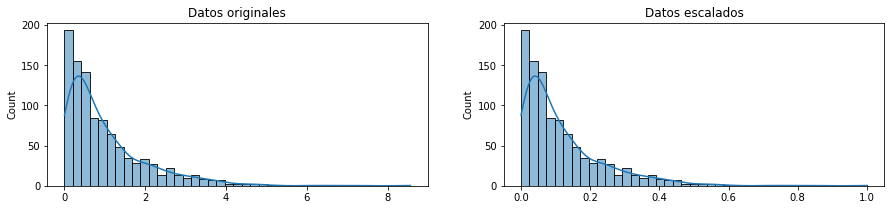

In [ ]:
# Generamos 1,000 puntos de datos aleatorios con una distribución exponencial
datos_originales = np.random.exponential(size = 1000)

#Min-max escalamiento de datos entre 0 y 1
datos_escalados = minmax_scaling(datos_originales, columns=[0])

#Graficamos nuestros resultados para comparar
fig, ax = plt.subplots(1, 2, figsize = (15, 3))
sns.histplot(datos_originales, ax = ax[0], kde = True, legend = False)
ax[0].set_title("Datos originales")
sns.histplot(datos_escalados, ax = ax[1], kde = True, legend = False)
ax[1].set_title("Datos escalados")
plt.show()

Como podemos notar, la forma en que estan distribuidos los datos no cambian, pero ahora estan distribuidos de 0 a 1 y no de 0 a 6.

## Paso 3: Normalización

El escalamiento solo cambia el rango de nuestros datos. La normalización es una transformación un poco más radical. El punto principal de la normalización es cambiar nuestras observaciones para que puedan formar lo que se conoce como una distribución normal.

> **Distribución normal:** También conocida como curva de campana, es una distribución estadística específica donde las observaciones aproximadamente iguales caen por encima y por debajo de la media, la media y la mediana son aproximadamente iguales y hay más observaciones más cercanas a la media. La distribución normal también se conoce como distribución gaussiana.

En general, lo que se busca es normalizar los datos para ayudar a generar modelos con herramientas como aprendizaje de máquina o técnicas estadísticas que asumen que nuestros datos estan normalmente distribuidos. Alunos ejemplos incluyen los metodos de analisis de discriminación linear y cualquier método que incluya gaussiano en su nombre.

Algunos tipos comunes de normalización:

### Puntaje Z o puntaje estandar

En este método tenemos que para cada valor de la distribución restamos el promedio o la media, y luego lo dividimos por la desviación estandar. Esto da un rango de aproximadamente menos 3 a 3 (podría ser más o menos).

$X_{new} = \frac{X_{old}- mean}{STD(sigma)}$

Podemos codificarlo de la siguiente manera:

In [ ]:
def z_score(arr):
  """
  Aplica la normalización de puntaje z a un vector o serie
  """
  mean_ = np.mean(arr)
  std_ = np.std(arr)

  new_arr = [(i-mean_)/std_ for i in arr]
  return new_arr


### Normalización Box-Cox

Una transformación de Box-Cox es una transformación de una variable dependiente no normal en una forma normal. 
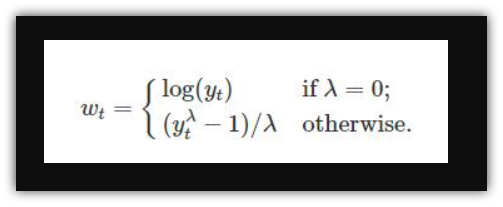


 Para este método existe una librería de python que podemos utiliazar para codificar.

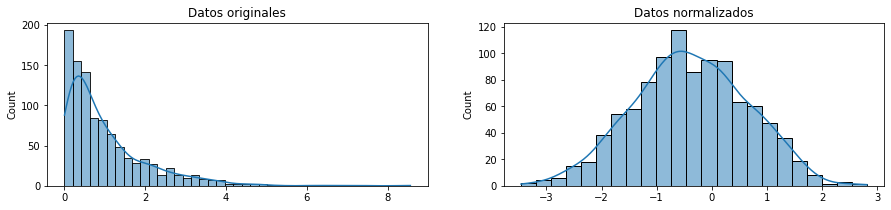

In [ ]:
# Normalizamos los datos con boxcox
normalized_data = stats.boxcox(datos_originales)

# Graficamos ambos para comparar
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(datos_originales, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Datos originales")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Datos normalizados")
plt.show()

# **3. Análisis de fechas**

En data sets en los que trabajes con predicciones es bastante comun encontrar columnas con fechas. Algunas son bastante detalladas, otras solo tendran el mes o año. En algunos casos nos encontramos con que el formato de fechas cambia en distintas bases de datos. 


## Paso 1: Cargar librerías

Lo primero que tenemos que hacer es cargar todas las librerías que necesitamos. En este ejemplo vamos a utilizar una base de datos que contiene información sobre deslaves que pasaron entre el año 2007 y 2016.

Al igual que en la primer fase de este notebook, tenemos que conseguir la base de datos del siguiente [link](https://www.kaggle.com/nasa/landslide-events) y agregarlo a nuestra carpeta de google drive que tenemos cargada en nuestro colab.



In [ ]:
#Modulos que vamos a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

#Cargar la base de datos
landslides = pd.read_csv("/content/drive/MyDrive/Datasets/catalog.csv")

#Random seed
np.random.seed(0)

Todas las librerías que cargamos ya estamos familiarizados con lo que hacen. En el caso de la librería de datetime, depende de la base de datos que tengas es la aplicación que vas a darle. En este caso veremos un ejemplo en especifico, pero si quieres saber más sobre las aplicaciones de esta librería, puedes ver este [link](https://www.w3schools.com/python/python_datetime.asp).



## Paso 2: Revisar el tipo de datos de columna fecha

Iniciamos con la revisión de los datos con la función head() que vimos anteriormente.

In [ ]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,location_description,latitude,longitude,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,Unknown,38.6009,-77.2682,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,NaN,40.5175,-81.4305,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,Urban area,40.4377,-79.9160,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,Above river,45.3226,-73.7771,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,Below road,37.4325,-82.4931,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


Vemos que la columna que necesitamos se llama date. En caso de que ya sepas en nombre de la columna que vas a utilizar, puedes hacer un print mas especifico.

In [ ]:
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


Ya que doble confirmamos que esta base de datos tiene información de fechas, tenemos que asegurarnos de que python también este al corriente que esta columna se trata de fechas. Si observamos la última linea del resultado anterior, podemos ver que el tipo de dato que dice que esta columna contiene es object.

> La librería de Pandas usa la etiqueta de object dtype para guardar varios tipos de valores, pero usualmente cuando revisas el dtype de la columna y sale objeto, se trata de strings. 

Esto es un problema ya que cuando revisas la documentación de pandas, ya existe un dtype de datos que pertenece a fechas llamado datetime64. Entonces, ya que nuestra columna date se imprime como object y no como datetime64, podemos ver que python no reconoce nuestros datos como fechas.

Otra manera de revisar que tipo de datos contiene una columna:

In [ ]:
landslides['date'].dtype

dtype('O')

Para interpretar este resultado puedes leer la documentación de la librería de numpy para saber que la letra 'O' representa object. 

## Paso 3: Convierte columna de fecha a datetime

Ahora que aseguramos que nuestros datos de la columna date aun no son reconocidos por python como datetime, podemos empezar a corregir y cambiar los formatos. A esto se le llama parsing dates, que se traduce crudamente a analisis de fechas, porque estamos tomando el valor de la celda como un string y vamos a hacer que python identifique las partes que la componen.

Podemos determinar cual es el formato de nuestra columna de fechas con el siguiente [cheatsheet](https://strftime.org/). La idea básica de este proceso es que debemos analizar cuales son las parted de la fecha y cual es el tipo de puntuación que las divide. Hay una gran variedad de diferentes formas de tener fechas, pero las más comunes es dia/mes/año, que se representa como %d, %m, %y por sus nombres en inglés. Estas son las representaciónes para numeros de dos digitos, por ejemplo 21/02/21. En caso de que el año se represente con cuatro digitos, es necesario poner %Y con mayúscula.

En el caso de nuestra base de datos, el formato es de mes/dia/año (común en bases de datos de USA), asi que lo primero que tenemos que hacer es establecer estas variables de esa manera.

In [ ]:
#Creamos una nueva columna que contenga los valores de fecha con el formato que 
#python requiere para reconocerla como datetime

landslides['date_parsed'] = pd.to_datetime(landslides['date'], format = "%m/%d/%y")

Ahora podemos revisar si el tipo de dato cambia en la nueva columna que generamos con la función head().

In [ ]:
landslides['date_parsed'].head()


0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

Ya que estan en este formato de datetime, puedes interactuar con esta información para modelos de predicción.

Algunas de las dudas más comunes que surgen cuando se estan analizando las columnas que contienen fechas son:

> **¿Que hacer si me marca error el código anterior porque tengo multiples formatos de fecha?** Como mencionamos anteriormente, existen algunas bases de datos que puede que tengan formatos inconsistentes de fechas en una sola columna. Si te llega a pasar eso, puedes utilizar pandas para que trate de hacer una inferencia en cual es el formato correcto con el siguiente código:

```python
landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format = True)
```

> **¿Porque entonces no empiezo con esa linea de código en lugar de solo especificar un tipo de fecha?** Hay dos razones por las cuales es preferible dejar esta línea de código hasta que ocurra un error. La primera es que pandas no siempre es capaz de adivinar el tipo de formato correcto si de deja que elija. La segunda es que es un proceso pesado, y si se tiene una base de datos grande (como es comun en bases de datos con fechas de varios años) el proceso de especificar fechas se alargaría mucho más.

## Paso 4: Extraer información especifica

Para este paso tomamos en cuenta que tal vez se quiere sacar información de un mes o un día en especifico. En este caso en el ejemplo siguiente extraemos solo el día del mes en el que ocurrió el deslave.

In [ ]:
day_landslides = landslides['date_parsed'].dt.day
day_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

Si revisamos los resultados de landslides['date_parsed'].head() con estos nuevos resultados vemos que efectivamente nos muestra el día del mes en el que ocurrió el deslave. 

Si hubieramos tratado de correr este mismo código con la columna date original, nos hubiera arrojado un error, ya que el valor dt. solo funciona con tipos de datos datetimelike y no con tipo object. Cuando trabajes con otras bases de datos, a pesar de que puedan tener fechas, primero es necesario realizar este analisis antes de poder interactuar con la información.

## Paso 5: Graficar resultados

Hay muchas maneras en las que puedes gráficar fechas. La más comun es cuando queremos hacer pronósticos y graficamos una linea del tiempo. En este caso solo queremos asegurar que no hay ningun dato extraño dentro de nuestras fechas. Para hacer esto, vamos a graficar un histograma con los datos de los días del mes en los que ocurrió el deslave. En este caso podemos esperar que el comportamiento de la gráfica sea entre valores del 1 al 31 porque no hay meses que tengan mas días que esos. 

Los deslaves pueden ser mas comunes en algunos días que en otros, pero no queremos más información al respecto que saber que no hay datos extraños, por lo que la distribución puede ser bastante a la par.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


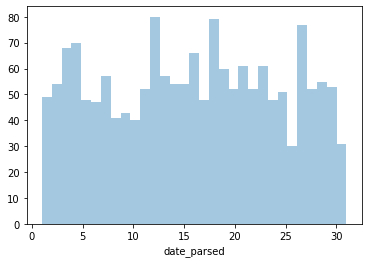

In [ ]:
#Para evitar errores en la gráfica eliminamos los valores nulos.
day_landslides = day_landslides.dropna()

#Graficamos 
sns.distplot(day_landslides, kde =False, bins = 31)

Parece que la información de los dias es correcta.

# **4. Codificación de caracteres**

Primeramente es importante saber que es codificación de caracteres:

> **Codificación de caracteres:** Se refiera una serie especifica de reglas para mapear información desde cadenas de datos binarios sin procesar (el ejemplo más común que encontramos en bases de datos se ve algo como esto: 0010011100101011) y se transforman a datos entendibles por el ser humano (como por ejemplo strings de texto). Existen muchos diferentes tipos de codificaciones, y si tratas de traducirlo con la codificacón equivocada, puedes terminar con un texto que no tiene nada de sentido o que aparecen como "unknown characters", que es cuando aparecen rombos con signos de interrgación.

Las discrepancias en la codificación de caracteres son menos comunes hoy en día de lo que solían ser, pero sigue siendo un problema al que nos podemos encontrar. Hay muchos diferentes tipos de codificaciones, pero el que es más común de utilizar es el UTF-8.

> **UTF-8:** Es un tipo de codificación de texto que refiere a python. Todo código de python estan en fomato UTF-8, e idelmente, los datos con los que trabajemos deben de estar en ese mismo formato. Es cuando una base de datos contiene caracteres diferentes de este formato que entramos en problemas

Vamos a realizar un experimento de que pasa cuando convertimos y reemplazamos codificaciones.

## Paso 1: Codificación UTF-8

Primero iniciamos cargando las librerías que necesitamos para este ejemplo. En este caso tenemos también otra base de datos con problemas de codificación. Repitiendo el proceso que llevamos haciendo, tenemos que descargar la base de datos del siguiente [link](https://www.kaggle.com/kemical/kickstarter-projects) y guardarlo en nuestra carpeta de drive que esta vinculada a nuestro colab.

In [ ]:
#Modulos que usaremos
import pandas as pd
import numpy as np

#Modulo que nos ayudara con las codificaciones
import chardet

#Random seed
np.random.seed(0)

Empezamos con un ejemplo sencillo. 

In [ ]:
#Iniciamos con un string
antes = "Este es el simbolo de un euro: €"

#Revisamos el tipo de datatype que arroja
type(antes)

str

Ahora vamos a convertir este string en tipo de datos byte especificando con que tipo de codificación estamos lidiando.

In [ ]:
#Codificar a uno diferente, reemplazando caracteres que pueden causar error
despues = antes.encode("utf-8", errors= "replace")

#Revisamos el tipo de dato de nuevo
type(despues)

bytes

Que pasa ahora si intentamos imprimir nuestro string ahora.

In [ ]:
despues

b'Este es el simbolo de un euro: \xe2\x82\xac'

Vemos que al inicio del objeto que tenemos ahora lo precede una b, después algo de texto. Eso es porque los tipos de datos byte se imprimen como si fueran datos codificados en ASCII.

> ASCII es una codificación de texto mas antigua que no funciona para muchas otras cosas mas que para escribir texto en inglés.

En el resultado podemos ver también que lo que inició como un simbolo de euro se transformó en un disparate (\xe2\x82\xac) que solo significa que la codificación de ASCII intento traducirlo al inglés pero fallo.

Cuando corregimos y convertimos nuestros datos tipo byte de nuevo a string con la codificación correcta, podemos ver que nuestro texto regresa a la normalidad.

In [ ]:
#Convertimos nuestro string de nuevo a utf-8
print(despues.decode("utf-8"))

Este es el simbolo de un euro: €


Toma en cuenta que siempre que trates de usar una codificación que no pertenece a tu base de datos, esta la va a rechazar y te mandara un mensaje de error. Por ejemplo, con esto que acabamos de realizar de datos byte, si no le dices a python en tu código que con lo que esta lidiando es otro tipo de codificación, python va a intentar rellenarlo con otra cosa, y es cuando tenemos como resultado datos que no tienen sentido.

> Un ejemplo comunmente usado para representar datos y sus codificaciones se puede decir como las diferentes formas que teniamos de escuchar música. Podemos reproducir musica en un CD, o en un cassete, o en un vinil. La musica sonará mas o menos igual para nosotros, pero necesitamos reproducir cada elemento en su equipo correcto. No puedes reproducir un cassete en un reproductor de CDs. Lo mismo aplica en este punto.

Veamos un ejemplo de intentar leer un objeto con una codificación distinta.


In [ ]:
# Con nuestra variable convertida en bytes, vamos a leerla con el codificador ASCCI

print(despues.decode("ascii"))

UnicodeDecodeError: ignored

Algo que tenemos que tomar en cuenta también es que al usar encode() para convertir nuestros datos a una codificación diferente, hay ocasiones en que algunos caracteres se reemplazaran con valores desconocidos, y cuando queramos convertirlos de regreso a nuestros datos originales, estos caracteres se perderan. La parte peligrosa de eso es que no hay manera de recuperar esos datos, y básicamente estaremos dejando nuestra base de datos inusable.

In [ ]:
#Repitamos el ejemplo para ejemplificar lo que acabamos de decir
antes = "Este es un simbolo de euro: €"

#Codificamos con un ascii e indicamos que queremos reemplazar valores que causen error
despues = antes.encode("ascii", errors = "replace")

#Convertimos de regreso a utf-8
print(despues.decode("ascii"))

Este es un simbolo de euro: ?


Si nos fijamos en el resultado, hemos perdido parte de nuestros datos. Aqui es sencillo hacer inferencia de los datos perdidos, pero si realizas esto con toda una columna de una base de datos, será mucho más dificil saber cuales son los datos perdidos.

## Paso 2: Leer archivos con problemas de codificación

Ahora que sabemos que utf-8 es el default que vamos a encontrar dentro de muchas bases de datos que existen, vamos a revisar que podemos hacer si nos encontramos con bases de datos que no cumplen con ese estandar.

Para esto tenemos otra base de datos que descargamos y vinculamos desde el paso uno. Ahora solo tenemos que mandarla a llamar como hemos realizado anteriormente.

In [ ]:
#Empezamos leyendo el archivo como normalmente lo hacemos.
kickstarter_2016 = pd.read_csv("/content/drive/MyDrive/Datasets/ks-projects-201612.csv")

UnicodeDecodeError: ignored

Siempre que un código nos genere errores, hay que revisar el último que aparece. En este caso vemos que el ultimo error es "UnicodeDecodeError" ya que intentamos leer utf-8 bytes como si fuesen ASCII. Este error nos dice que el archivo que estamos intentando abrir no es utf-8. Sin embargo, aun no sabemos que tipo de codificación es en realidad.

Una manera de averiguar cual es la codificación que necesitamos es intentar y probar varias codificaciones de caracteres para saber cual funciona. Este proceso puede ser algo tedioso, por lo que siempre se sugiere iniciar con el modulo chadet de python que intenta adivinar automáticamente cual es el tipo de codificación que se tiene en el archivo. No se tiene una garantía del 100% de que llegue a una respuesta correcta, pero es la ruta más rápida con la que contamos.

Para este experimento vamos a extraer solo los primeros 10,000 bytes del archivo. Esta cantidad de información por lo general es suficiente para poder hacer una buena predicción de cual es la codificación, además de que es mucho más rápido que darle todo el archivo de primeras.


In [ ]:
#Revisamos los primeros 10,000 caracteres para predecir la codificacion
with open("/content/drive/MyDrive/Datasets/ks-projects-201801.csv", 'rb') as rawdata:
  result = chardet.detect(rawdata.read(10000))

#Imprimimos para saber el tipo de codificador.
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


En el resultado podemos ver que la función de chardet tiene una confianza del 73% de que la codificiación correcta es la de "Windows-1252". Verificamos si esta predición es correcta.

In [ ]:
#Leemos el archivo con la sugerencia de chardet
kickstarter_2016 = pd.read_csv("/content/drive/MyDrive/Datasets/ks-projects-201612.csv", encoding = 'Windows-1252')

#Revisamos los primeros datos
kickstarter_2016.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


Listo, ahora podemos leer el archivo sin ningún problema. Si nos fijamos en la parte de arriba hay algunos warnings dtype en varias columnas, pero como son pocas advertencias, podemos revisar que es lo que pasa en esas columnas mas adelante.

> Ojo, en caso de que el chardet no sea correcto en su predicción del tipo de codificador, lo que nos queda hacer a nosotros es la primera opcion que mencionamos, en la que tenemos que ir buscando entre las diferentes codificaciones hasta encontrar la adecuada.

## Paso 3: Guardar archivo con codificación UTF-8.

Una vez que terminamos de generar el archivo en el formato correcto que podamos trabajar con el, lo unico que nos queda por hacer es guardar ese archivo para poder utilizarlo más adelante. La manera mas sencilla de guardar archivos a los que les has cambiado la codificación es guardarlos en formato utf-8. 

Este es el paso mas sencillo, ya que como comentabamos anteriormente el utf-8 es el codificador default de python, por lo que si lo guardamos asi nadamas, este se va a guardar automaticamente en ese formato.

In [ ]:
kickstarter_2016.to_csv("/content/drive/MyDrive/Datasets/ks-limpio-2016.csv")

# **5. Datos inconsistentes**

En este ejercicio veremos como limpiar texto inconsistente dentro de nuestra base de datos. Iniciamos importanto las librerías de python que vamos a utilizar. La base de datos que vamos a utilizar en este ejercicio podemos revisarla en este [link](https://www.kaggle.com/alexisbcook/pakistan-intellectual-capital). Al igual que en los otros procesos que llevamos, tenemos que guardar este archivo en nuestro drive.

In [ ]:
!pip3 install fuzzywuzzy

In [ ]:
#Modulos a utlilizar
import pandas as pd
import numpy as np

#Modulos que ayudan a la limpieza de texto
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

#Importamos la base de datos para este ejemplo
profesores = pd.read_csv("/content/drive/MyDrive/Datasets/pakistan_intellectual_capital.csv")

#random seed
np.random.seed(0)

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Paso 1: Procesamiento preliminar de datos

Primeramente tenemos que dar una revisión rápida de los datos.

In [ ]:
profesores.head()

,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"Information processing, Multimedia mining",NaN
3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,Pakistan,2005.0,VLSI Electronics DLD Database,NaN


En el caso de inconsistencias en los datos, podemos concentrarnos solo en las columnas de datos que sean de nuestro interes (para cumplir nuestro objetivo). Para este ejemplo estaremos usando la columna de Country. 

Cuando los datos no son muchos (por ejemplo, si yo buscara inconsistencias en mi lista de alumnos) podríamos tomar la columna y hacer una revisión manual, pero como en este caso nuestra base de datos tiene demasiadas filas como para revisarlas individualmente, podemos hacer lo siguiente.

In [ ]:
#Primero obtenemos todos los valores unicos de la columna
countries = profesores['Country'].unique()

#Vamos a acomodarlos en orden alfabetico
countries.sort()
countries


array([' Germany', ' New Zealand', ' Sweden', ' USA', 'Australia',
       'Austria', 'Canada', 'China', 'Finland', 'France', 'Greece',
       'HongKong', 'Ireland', 'Italy', 'Japan', 'Macau', 'Malaysia',
       'Mauritius', 'Netherland', 'New Zealand', 'Norway', 'Pakistan',
       'Portugal', 'Russian Federation', 'Saudi Arabia', 'Scotland',
       'Singapore', 'South Korea', 'SouthKorea', 'Spain', 'Sweden',
       'Thailand', 'Turkey', 'UK', 'USA', 'USofA', 'Urbana', 'germany'],
      dtype=object)

Revisando los resultados vemos que los primeros datos que se muestran pueden ser tomadas en cuenta como nuestras inconsistencias, primeramente porque estan antes de australia, que debería ser el primer dato, y segundo, porque si miramos con atención, podemos ver que esos son valores que se repiten dentro de la lista de valores unicos.

Lo primero que podemos hacer es cambiar todos los valores a minuscula (este es un cambio que podemos revertir mas adelante). Otra cosa que podemos corregir son los espacios en blanco que tienen algunas palabras. Python siempre tiene problemas cuando nombres de variables tienen espacios, al igual que nombres de archivos, entonces para estar en el lado seguro, quitamos los espacios.



In [ ]:
#Primero convertimos todo a lowercase
profesores['Country'] = profesores['Country'].str.lower()

#Ahora vamos a quitar todos los espacios en los titulos
profesores['Country'] = profesores['Country'].str.strip()


## Paso 2: Usar Fuzzy matching para corregir inconsistencias

Ya que corregimos las partes más sencillas, podemos empezar a revisar si existen inconcistencias mas fuertes. Primero empezamos con la columna de 'Country' para ber si tenemos que limpiar algo más de datos.

In [ ]:
#Revisamos de nuevo los valores unicos de la columna 'Country'
countries = profesores['Country'].unique()

#Vamos a ordenarlos alfabeticamente e imprimirlas
countries.sort()
countries


array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea',
       'southkorea', 'spain', 'sweden', 'thailand', 'turkey', 'uk',
       'urbana', 'usa', 'usofa'], dtype=object)

Si vemos con atención podemos ver que existe otra inconsistencia. South korea y southkorea deberían ser el mismo. Utilizamos la librería que importamos anteriormente. fuzzywuzzy para poder identificar cuales son los strings mas cercanos unos con otros. 

Veamos primero la cantidad de datos con las que contamos.


In [ ]:
profesores.shape


(1142, 13)

Este data set es lo suficientemente pequeño que podemos revisar y corregir los errores que encontremos a mano, pero sería bastante ineficiente. Empezar con un ejemplo sencillo nos ayudará a aprender a escalarlo, y cuando tengamos una base de datos mucho mas grande, será mas sencillo limpiar los datos. Primeramente, que es el fuzzy matching:

> **Fuzzy matching:** Se traduce como coincidencia difusa. Se trata de un proceso automático que ayuda a encontrar el texto más similar al string objetivo. En general, el concepto de que un string sea más cercano a otro es que tengas que cambiar la menor cantidad de caracteres para que una se transforme en la otra. Por ejemplo, con las palabras australia y austria que tenemos en la base de datos. Si nosotros quisieramos cambiarlas, solo tendrias que remover la 'a' y la 'l' de austr-al-ia y tenemos la palabra austria. A pesar de que esta herramienta no es 100% correcta en el matching, la mayoría de las veces termina siendo de gran ayuda en reducir el tiempo que nos lleva esta etapa.

Fuzzywuzzy nos regresa el radio que separa dos strings. Entre más cercano sea el radio a 100, la cantidad de cosas que necesita editar es menor. En el siguiente experimento vamos a tomar 10 de los strings que tenemos en nuestra lista de ciudades que tienen la menor distancia a una palabra en especifico.

In [ ]:
#Cuales son las 10 palabras que dan mejor match a soth korea

matches = fuzzywuzzy.process.extract("south korea", countries, limit = 10, scorer = fuzzywuzzy.fuzz.token_sort_ratio)

#imprimimos nuestros resultados
matches

[('south korea', 100),
 ('southkorea', 48),
 ('saudi arabia', 43),
 ('norway', 35),
 ('ireland', 33),
 ('portugal', 32),
 ('singapore', 30),
 ('netherland', 29),
 ('macau', 25),
 ('usofa', 25)]

Podemos ver que las palabras mas parecidas a 'south korea' en nuestra columna de countries son la misma palabra 'south korea' y 'southkorea'. Vemos que el matching llega a un 48%. Esto vamos a utilizarlo para generar una función que nos ayude a reemplazar strings que esten muy parecidas. En este caso, nuestro radio minimo puede ser de 48%.

In [ ]:
from os import close
#Función para reemplazar las strings

def replace_matches(df, column, match_string, min_ratio = 47):
  """
  Esta función reemplaza las filas de la columna de cierto database que le demos
  y dependiendo del radio minimo que le indiquemos es el match que tendrá

  @param:
  df - nuestro dataset
  column - columna del data set
  match_sting - palabra que vamos a hacer matching
  min_ratio - radio minimo para preferencia de matching
  """
  #Establecer cuales son los valores unicos
  strings = df[column].unique()
  #Tomar los primeros 10 matches con el más alto matching radio.
  matches = fuzzywuzzy.process.extract(match_string, strings, limit = 10, scorer =fuzzywuzzy.fuzz.token_sort_ratio)
  #Darme los matches que cumplan con el min radio.
  close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
  #Filas con mayor matching
  rows_with_matches = df[column].isin(close_matches)
  df.loc[rows_with_matches, column] = match_string

  print("Proceso terminado")



In [ ]:
#Mandamos llamar función de replace matches
replace_matches(df = profesores, column = 'Country', match_string = "south korea")

Proceso terminado


Ya que realizamos nuestros cambios en la base de datos, podemos revisar la columna de "Country" de nuevo para revisar que nuestro problema con el nombre de "south korea" se ha arreglado.

In [ ]:
#Volvemos a revisar los valores unicos de Country
countries = profesores['Country'].unique()

#Acomodarlas alfabeticamente e imprimirlas
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea', 'spain',
       'sweden', 'thailand', 'turkey', 'uk', 'urbana', 'usa', 'usofa'],
      dtype=object)

Podemos ver que nuestra base de datos ya solo representa un solo valor para south korea, lo que significa que nuestra función hizo su trabajo correctamente.